# Impact of Internet Access on Student Performance

## Introduction

One way to measure a student’s math ability is their final class grade. Different factors can influence this final grade. We propose studying how internet access at home may impact students' final grade, with our population being all students. Our question is the following: 

**Do students with internet access at home have higher mean final math grades than students without internet access at home?**

There are a few reasons why we chose this topic. For one, we wanted our question to involve students as it makes this project personal and relevant, and therefore more interesting to us. This question is also relevant due to the prevalence of wifi-requiring tools used in education today. 

Our location parameter is the mean final grade, and our scale parameter is the standard deviation. The range of our response variable is small (0 to 20) and therefore outliers won't be overly influential on the mean and standard deviation. 

## Description of the Data Set

The sample we use is from the The Student Performance Data Set, created by two researchers, Paulo Cortez and Alice Silva, in 2008. They obtained the performance of secondary students from 2 Portuguese schools in math by collecting school reports and questionnaires to create a data set that consists of 33 columns with 395 rows that correspond to the number of students that participated in the study.  

Previous studies have shown that the internet has led to an increase in grades if used optimally (Austin & Totaro, 2011) and that the majority of teachers are now using the internet as a teaching and learning tool (Sampath & Manjunath, 2013). Therefore, we are interested in analyzing the impact of internet access at home to students' final grade. 

We will be using the internet column as our explanatory variable and the G3 attribute as our response variable. The internet column is a binary variable that describes whether or not the student has internet access at home. The G3 column describes the final year Mathematics grade of the student (from 0-20). While this data is technically discrete, it can take on more values than typical discerete variables. As well, these values are more closely correlated to a measurement than a classification because we use them to represent a student's score across the range 0-21 (similar to how we would assign a percentage grade 0-100%). For the purposes of this report, we will treat G3 as quantitative. 

In order to prove that this report is trustworthy, we must assess the quality of the data we are using. We can say that our data is *relatively* unbiased. Because it was collected using a survey, students from all backgrounds had equal opportunity to participate. However, we must also acknowledge other factors that may infuence our data. For example, students with internet access may come from higher income families who can offer them academic reasources lower-income families don't have access to. These factors may account for some of grade disparities we see in our analysis, irregardless of internet access. As well, we have defined our population to be the set of all students, while our data only represents students from 2 Portugese schools. Though we are generalizing our results to the whole population, we must keep in mind this limitation.

## Preliminary Analysis

In [2]:
# Loading needed libraries
library(tidyverse)
library(cowplot)
library(infer)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# Reading the data from our GitHub repository 
url <- "https://raw.githubusercontent.com/PrayusShrestha/stat-201-project/main/data/student-mat.csv"
raw_data <- read_delim(url, delim = ";")
"Table 1: Raw Data"
head(raw_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "Table 1: Raw Data"

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


From the tibble above, we see that the raw data we read is already in a tidy format. Each row is an observation, each column is a variable, and each cell is a value (Data Science: A First Introduction). Over the next few code cells, we will be renaming columns to be more readable (`G3` becomes `final_grade`), selecting the relevant columns (`internet` and `final_grade`) and checking if null values exist (and dealing with them if they do). We will then check the count of students with and without internet access. Finally, we will calculate summary statistics. 

In [4]:
# Selecting for just the relevant columns and changing column name to be more human readable
data <- raw_data  %>% 
    mutate(final_grade = G3)  %>% 
    select(internet, final_grade)
"Table 2: Relevent Columns"
head(data)

[1] "Table 2: Relevent Columns"

internet,final_grade
<chr>,<dbl>
no,6
yes,6
yes,10
yes,15
no,10
yes,15


In [5]:
# Checking if any rows have null values 
num_of_na_internet <- sum(is.na(data$internet))
num_of_na_final_grade <- sum(is.na(data$final_grade))

num_of_na_internet
num_of_na_final_grade

[1] 0

[1] 0

From the above, it can be seen there there are no NA values.

In [6]:
# Counting how many of each category (access, or no access, to internet at home) are in the sample 
internet_access_tally <- data %>%
    group_by(internet) %>%
    tally()
"Table 3: Category Count"
internet_access_tally

[1] "Table 3: Category Count"

,internet,n
,<chr>,<int>
1,no,66
2,yes,329


In [7]:
# Generating summary statistics (standard deviation and mean)
data_summary  <- data  %>% 
    group_by(internet)  %>% 
    summarize(std_dev = sd(final_grade),
              mean_final_grade = mean(final_grade))
"Table 4: Summary Statistics"
data_summary

[1] "Table 4: Summary Statistics"

,internet,std_dev,mean_final_grade
,<chr>,<dbl>,<dbl>
1,no,4.485797,9.409091
2,yes,4.580494,10.617021


The table above shows the mean and standard deviation of final math grades, split by home internet access status. We can see that both groups have a similar standard deviation and the yes-internet group has a higher mean final grade than the no-internet group.

We will now create three histograms and one box and whisker plot to visualize the data and show its center, spread, and shape.

In [8]:
# 4 plots of the relevant raw data

# Plot 1: Final Grade Distribution of Students Without Internet Access
plot_no_internet <- data  %>% 
    filter(internet == "no")  %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 2) + 
    geom_vline(xintercept = data_summary$mean_final_grade[1], color = "red") + 
    xlab("Final Grade") + 
    ggtitle("Figure 1: Final Grade Distribution Students Without Internet Access") +
    theme(axis.title = element_text(size = 15)) +
    theme(plot.title = element_text(size = 15))

# Plot 2: Final Grade Distribution of Students With Internet Access
plot_have_internet <- data  %>% 
    filter(internet == "yes")  %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = data_summary$mean_final_grade[2], color = "red") + 
    xlab("Final Grade") + 
    ggtitle("Figure 2: Final Grade Distribution Students With Internet Access") +
    theme(axis.title = element_text(size = 15)) +
    theme(plot.title = element_text(size = 15))

# Plot 3: Final Grade Distribution of Students With and Without Internet
plot_both <- ggplot(data, aes(x = final_grade, fill = internet)) + 
    geom_histogram(binwidth = 2, alpha = 0.5, position = "identity", aes(y = ..density..)) + 
    xlab("Final Grade") + 
    ggtitle("Figure 3: Final Grade Distribution Students With and Without Internet") +
    theme(axis.title = element_text(size = 15)) +
    theme(plot.title = element_text(size = 15))

# Plot 4: Boxplot with Final Grade Distribution Students With and Without Internet
boxplot  <- ggplot(data = data, mapping = aes(x = internet, y = final_grade)) +
    geom_boxplot() +
    ggtitle("Figure 4: Boxplot of Final Grade Distribution Students With and Without Internet") + 
    labs(x = "Internet Access", y = "Final Grade") +
    theme(axis.title = element_text(size = 15)) +
    theme(plot.title = element_text(size = 15))

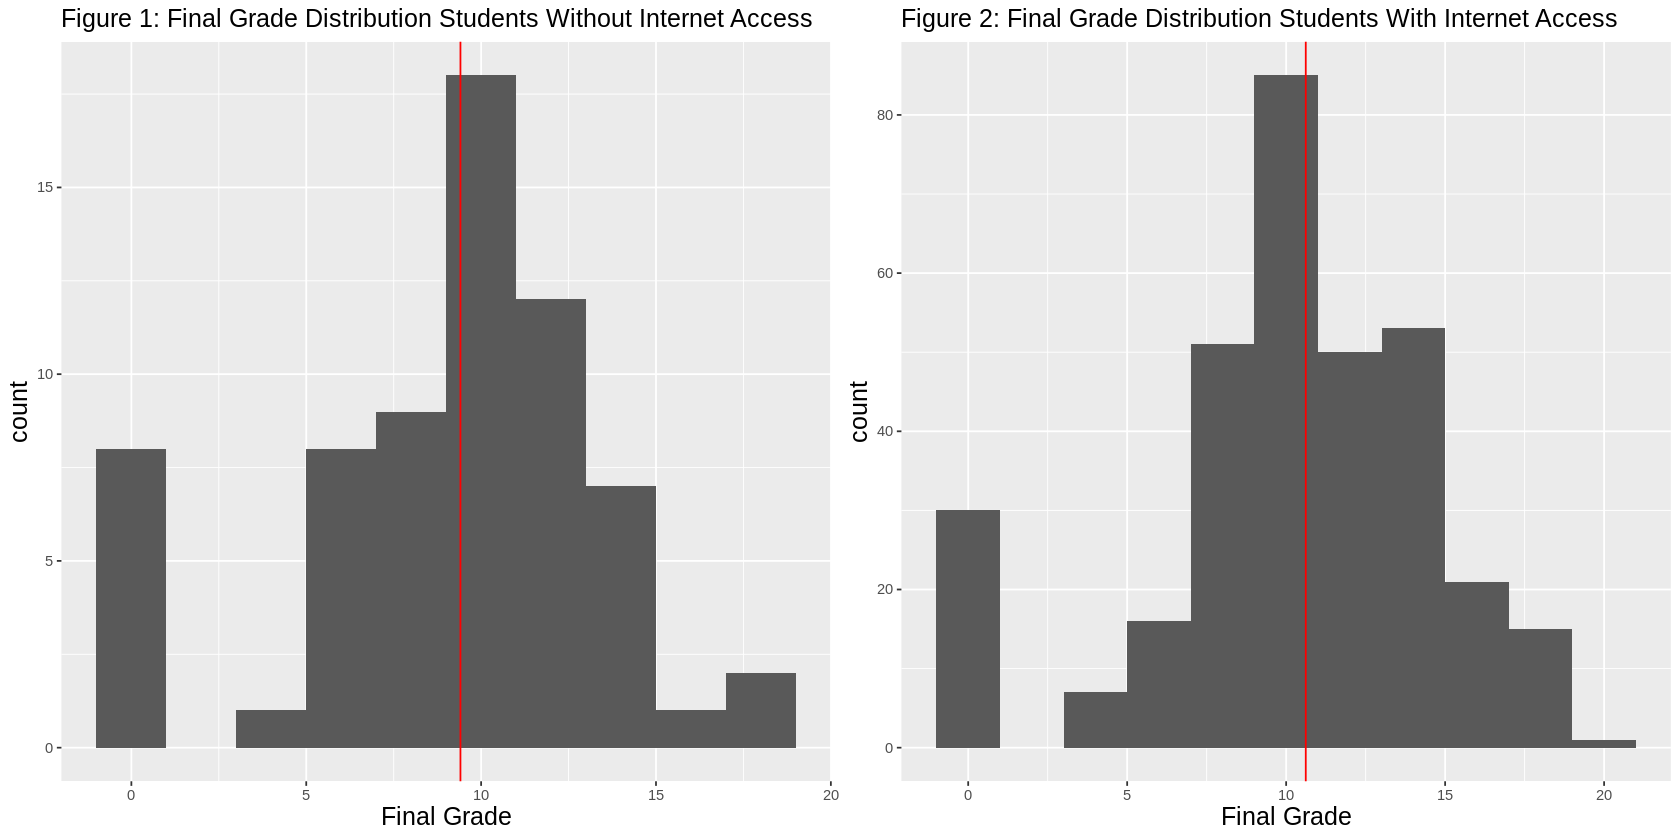

In [26]:
options(repr.plot.height = 7, repr.plot.width = 14)
plot_grid(plot_no_internet, plot_have_internet, ncol = 2)

The 2 histograms above each show a subset of our sample distribution, with each histogram having data filtered based on whether the student did or didn't have access to the internet at home. The vertical line represents their corresponding mean. In general, we can see a rough bell curve being formed; for both plots, there seems to be a spike of students who got a 0. We also can see a similar spread for both groups.

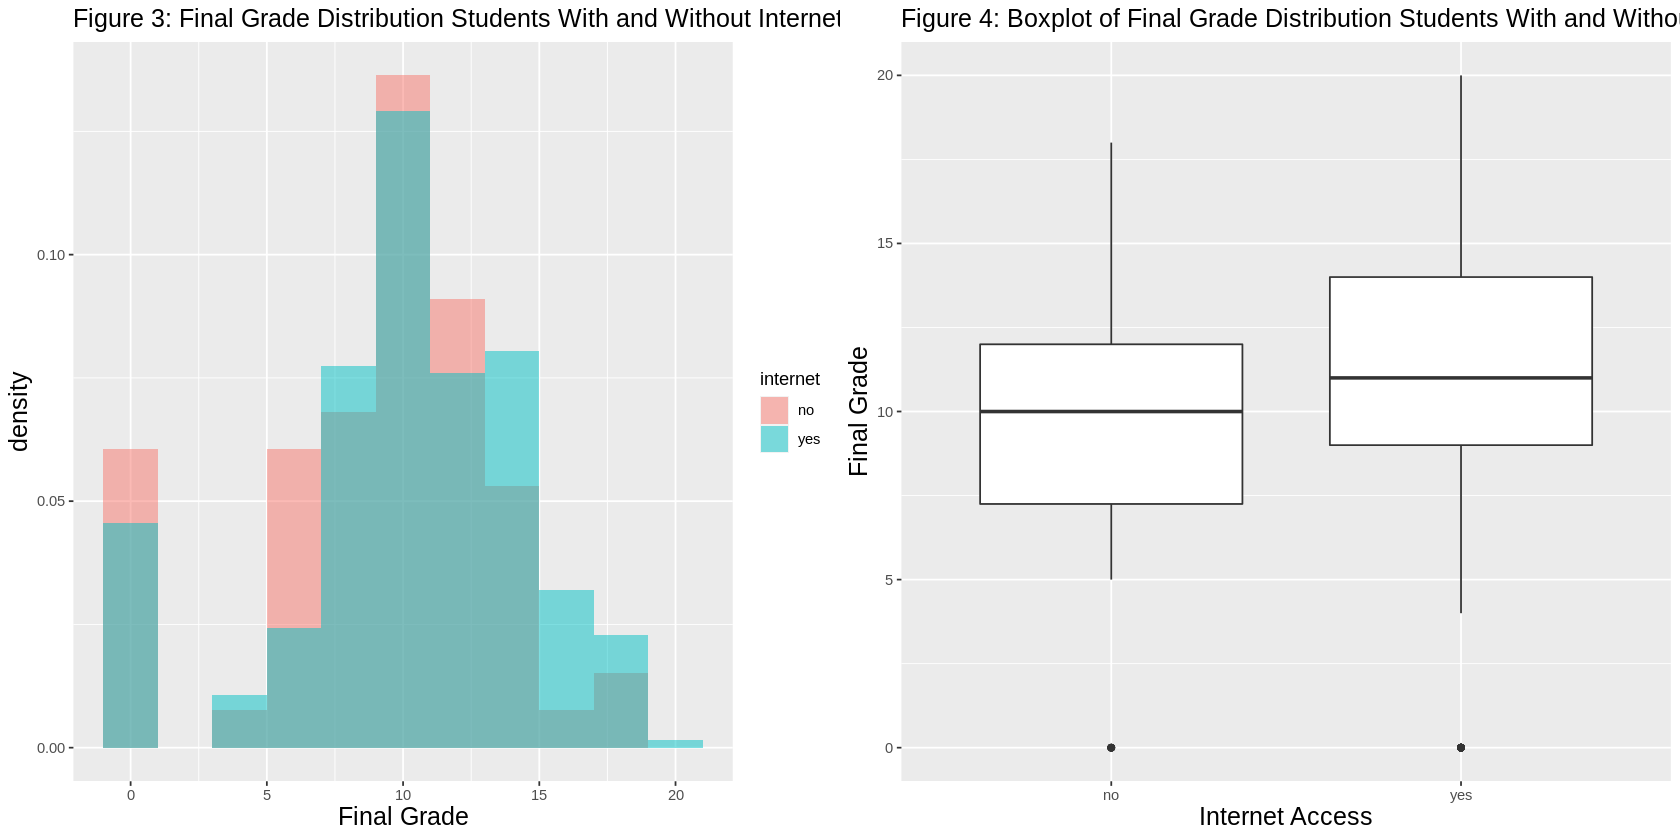

In [27]:
options(repr.plot.height = 7, repr.plot.width = 14)
plot_grid(plot_both, boxplot, ncol = 2)

In Figure 3, we observe that the data coloured blue (representing those with home internet access) seems to be shifted to the right (ie. towards a higher final grade) when compared to the light blue of those without internet access. 

Figure 4 tells a similar story to the previous histogram. It has the "yes" column (those with home internet access) having a higher median (and first and third quantiles) compared to the "no" column. 

## **Methods**
    
Based on Figures 3 and 4, we can hypothesize that students with internet access perform better than those without. This analysis of the data is limiting because we only have access to sample distributions and we do not have a measure of confidence or reliability for the means. To extend our analysis, we can construct confidence intervals for the difference of means of both groups of students and conduct hypothesis tests. 
    
#### **Difference of Means Hypothesis Test:**
$\mu_1:$ the mean grade of students *with* internet access <br>
$\mu_2:$ the mean grade of students *without* internet access
 
##### **Null hypothesis:**
$H_0: \mu_1 - \mu_2 = 0$
##### **Alternative hypothesis:**
$H_a: \mu_1 - \mu_2 > 0$
##### **Significance Level:** 0.05
 
<p> We expect that we will be able to reject our null hypothesis at a 5% significance level. In other words, we can show evidence that the mean grade of students without internet access is lower than the mean grade of students with internet access. 


One of our hypothesis tests is a two-sample t-test. This test assumes that the variances of the two groups are the same. In order to gain confidence that this assumption is met, we will also conduct a test for the equality of variances of the two groups.

#### **Equal Variances Hypothesis Test:**

$\sigma_1^2:$ the variance of grades of students *with* internet access <br>
$\sigma_2^2:$ the variance of grades of students *without* internet access

##### **Null hypothesis:**
$H_o: \sigma_1^2 = \sigma_2^2$
##### **Alternative hypothesis:**
$H_a: \sigma_1^2 \neq \sigma_2^2$

We expect that we will *not* be able to reject our null hypothesis at a 5% significance level. This wouldn't tell us that the variances in final grades between the two groups are equal. However, no evidence that the variances aren't equal can boost our confidence to some degree that the variances are similar.

## **Analysis**

### Breakdown of Analysis:
- Bootstrap Confidence Interval
- Asymptotics Confidence Interval
- Permute Hypothesis Test
- T-Sample T-Test
- F Test for Equal Variances

### Bootstrapping Confidence Interval

We are going to begin by creating a bootstrap sampling distribution for the difference in mean final grades between our two groups, those with internet access and those without. This distribution will help us create a plausible range of values for the actual difference in means, also known as a confidence interval.

To create a bootstrap distribution, we first specify our response and explanatory variables which are final math grades and internet access, respectively. Then, we create 1000 bootstrap replicates of our sample and calculate their sample statistics. The bootstrap sample statistics we want to calculate are the bootstrap samples' mean final grade of those with internet access minus the mean final grade of those without internet access. 

We will then visualize the bootstrap distribution.

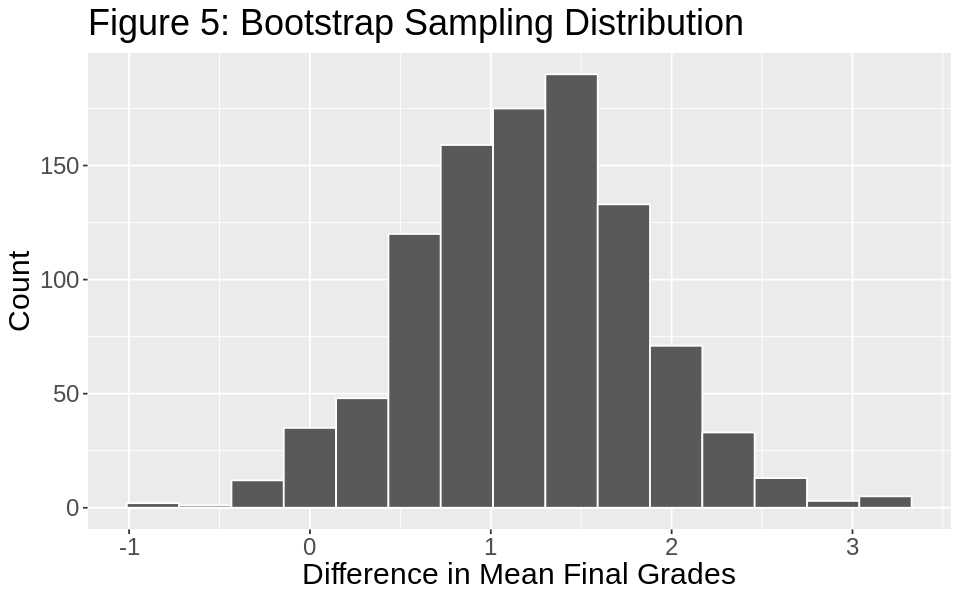

In [11]:
# Setting the seed to ensure reproducibility
set.seed(1)

# Creating the bootstrap distribution 
bootstrap_distribution <- data %>% 
  specify(formula = final_grade ~ internet) %>%   
  generate(reps = 1000, type = "bootstrap") %>% 
  calculate(stat = "diff in means", order = c("yes", "no"))

# Visualizing the bootstrap distribution
boot_dist_plot <- visualize(bootstrap_distribution) +
theme(text = element_text(size = 18)) +
ggtitle("Figure 5: Bootstrap Sampling Distribution") +
xlab("Difference in Mean Final Grades") +
ylab("Count")

boot_dist_plot 


In [12]:
# Calculating the mean of the bootstrap distrubution
mean(bootstrap_distribution$stat)

[1] 1.19944

Our bootstrap distribution in bell-shaped with a center around 1.2. If our estimated sampling distribution was a perfect image of the true sampling distribution, this would mean that on average people with internet access have a mean final grade about 1.2 points (out of 20) higher than people without internet access.

Now let's create a 95% confidence interval for our parameter, the difference of means between the two groups.

In [1]:
# Creating Bootstrap Confidence Interval
boot_ci <- bootstrap_distribution %>%
summarize(lower_ci = quantile(stat, 0.025),
          upper_ci = quantile(stat, 0.975))
"Table 5: Bootstrap Confidence Interval"
boot_ci

ERROR: Error in bootstrap_distribution %>% summarize(lower_ci = quantile(stat, : could not find function "%>%"


Our 95% confidence interval is -0.05574639 to 2.400558. These values are the 2.5th and 97.5th percentiles, respectively, of our bootstrap distribution. We are 95% confident that the true difference in mean final grades lies within this interval. In other words, if we take many many samples and calculate their difference in mean final grades, we expect that those values will fall within this confidence interval 95% of the time.

### Asymptotics Confidence Interval

Now we will calculate the 95% confidence interval using asymptotics and Central Limit Theorem (CLT). There are a few assumptions that need to be met in order to effectively use CLT. These assumptions will be mentioned later in the Discussion.

One way to calculate the confidence interval is by using the `t.test()` function. However, we want to use formulas to get sense of what calculations are taking place within the `t.test()` function.

The formula we need to use to calculate the confidence interval is the following:

$${\text{lower bound} = \bar{\mu_1}-\bar{\mu_2} - 0} + qt(0.025, {df}) \times {\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }$$

$${\text{upper bound} = \bar{\mu_1}-\bar{\mu_2} - 0} + qt(0.975, {df}) \times {\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }$$

where $$df = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$
<br>

<center>$\bar{\mu_1}:$ the sample mean grade of students with internet access <br><center>
<center>$\bar{\mu_2}:$ the sample mean grade of students without internet access <br><center>
<center>$s_1^2:$ the sample variance of grades of students with internet access <br><center>
<center>$s_2^2:$ the sample variance of grades of students without internet access <br><center>
<center>$n_1:$ the number of students with internet access in our sample <br><center>
<center>$n_2:$ the number of students without internet access in our sample <br><center>

In summary, we will be calculating the 2.5th and 97.5th quantiles of the appropriate t-distribution and multiplying it by our standard error. Then we will add and subtract this value from our point estimate to get the respective upper and lower bounds of our confidence interval.

Let's start by calculating the mean  variance of the final grades of our two groups, yes internet and no internet. We will also count up the sample size of each group.

In [14]:
# Creating a table of summary statistics
"Table 6: Summary Statistics"
internet_summary <- 
    data %>% 
    group_by(internet) %>% 
    summarise(sample_mean = mean(final_grade), 
              sample_var = var(final_grade), 
              n = n())
internet_summary

[1] "Table 6: Summary Statistics"

,internet,sample_mean,sample_var,n
,<chr>,<dbl>,<dbl>,<int>
1,no,9.409091,20.12238,66
2,yes,10.617021,20.98093,329


Let's calculate our point estimate, standard error, and degrees of freedom. Then we can use our formula to calculate the confidence interval.

In [15]:
# Calculating the difference in sample means
diff <- internet_summary$sample_mean[2] - internet_summary$sample_mean[1]

# Simplifying code
var1<-internet_summary$sample_var[1]
var2<-internet_summary$sample_var[2]
n1 <- internet_summary$n[1]
n2 <- internet_summary$n[2]

# Calculating standard error
se <- sqrt(var2/n2 + var1/n1)

# Calculating degrees of freedom
df <- (var2/n2 + var1/n1)^2/(var1^2/((n1^2)*(n1-1)) + var2^2/((n2^2)*(n2-1)))

# Calculating theoretical confidence intercal
theo_ci <- tibble(lower_ci = diff + qt(0.025, df)*se,
             upper_ci = diff + qt(0.975, df)*se)
"Table 7: Asymptotics Confidence Interval"
theo_ci

[1] "Table 7: Asymptotics Confidence Interval"

lower_ci,upper_ci
<dbl>,<dbl>
0.002415065,2.413446


Our asymptotic confidence interval ranges from 0.002415065 to 2.413446. As this confidence interval is also a 95% confidence interval, it has the same interpretation as our bootstrap confidence interval. We are 95% confident that the true difference in mean final grades lies within this interval.

As a reminder, here is Table 5, the confidence interval we got using bootstrapping:

In [16]:
"Table 5: Bootstrap Confidence Interval"
boot_ci

[1] "Table 5: Bootstrap Confidence Interval"

lower_ci,upper_ci
<dbl>,<dbl>
-0.05574639,2.400558


From our analysis above, we obtained a bootstrap confidence interval of -0.05574639 to 2.400558 and an asymptotic confidence interval of 0.002415065 to 2.413446. Both confidence intervals are quite similar due to the large sample size, however, the bootstrap CI is slightly wider than the asymptotic CI. Since we do not know the true population standard deviation, we are only using the sample standard deviation as an estimate. This results in an underestimate of uncertainties when using the asymptotic method, which leads to a narrower confidence interval.

Therefore, we can conclude that using a bootstrap confidence interval is better for estimating a confidence interval and computing uncertainty. Additionally, using the asymptotic method requires more assumptions including a large sample size and independent samples, unless the population distribution is normal.



### Permute Hypothesis Test

Now we will conduct a permute hypothesis test at the 5% significance level. 

As a reminder, our null and alternative hypotheses are the following:

$m_1:$ the mean grade of students *with* internet access <br>
$m_2:$ the mean grade of students *without* internet access

##### **Null hypothesis:**
$H_o: m_1 - m_2 = 0$
##### **Alternative hypothesis:**
$H_a: m_1 - m_2 > 0$

The code below is quite similar to the one we used to create the bootstrap distribution. The difference is that now we introduce the null hypothesis and switch "bootstrap" to "permute" as permutations are more suitable for hypothesis testing.

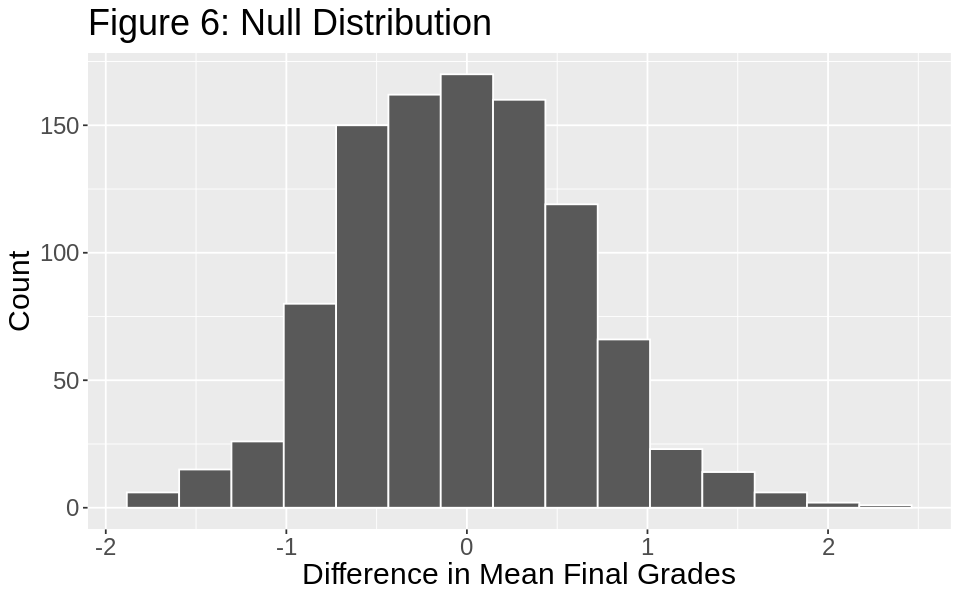

In [17]:
# Setting the seed to ensure reproducibility
set.seed(1)

# Creating the null distribution with 1000 replications
null_distribution <- data %>% 
  specify(formula = final_grade ~ internet) %>%   
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in means", order = c("yes", "no"))

# Visualizing the null distribution
null_plot <- visualize(null_distribution)  +
theme(text = element_text(size = 18)) +
ggtitle("Figure 6: Null Distribution") +
xlab("Difference in Mean Final Grades") +
ylab("Count")

null_plot 

We notice that unlike our bootstrap distribution, our null distribution is centered on 0.

We should calculate our point estimate. Our point estimate is the mean final grade of those with internet access minus the mean final grade of those without internet access.

In [18]:
# Calculating point estimate
obs_diff_mean <- data %>% 
  specify(final_grade ~ internet) %>% 
  calculate(stat = "diff in means", order = c("yes", "no")) %>%
  pull()
obs_diff_mean

[1] 1.20793

If our point estimate was equal to the true difference in means, we would say that on average people with internet access have a mean final grade about 1.208 points (out of 20) higher than people without internet access.

Now we will visualize our p-value.

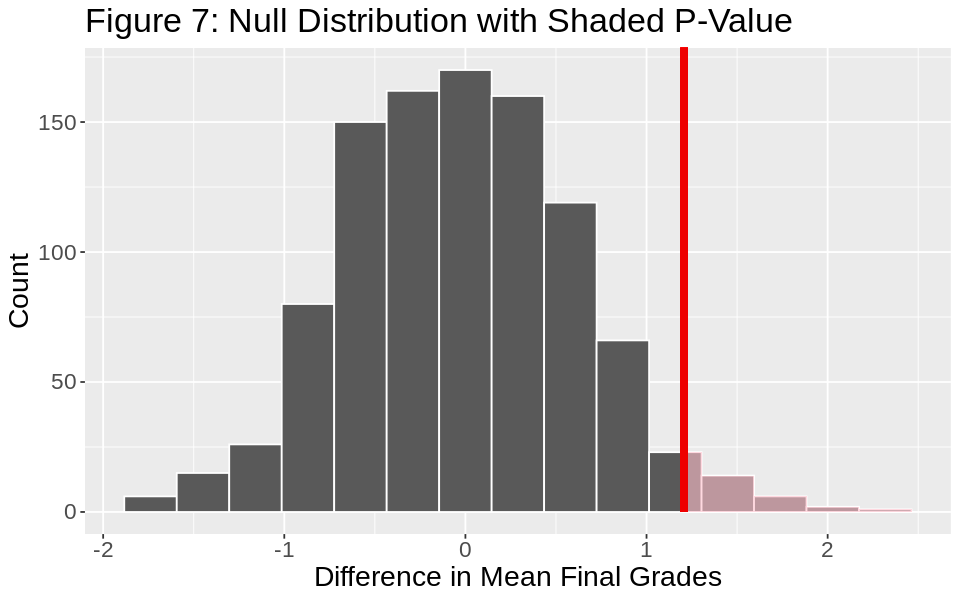

In [19]:
# Visualizing null distribution with p-value
null_p_plot <- visualize(null_distribution)  +
theme(text = element_text(size = 17)) +
ggtitle("Figure 7: Null Distribution with Shaded P-Value") +
xlab("Difference in Mean Final Grades") +
ylab("Count") +
shade_p_value(obs_stat = obs_diff_mean, direction = "right")

null_p_plot

The red line shows where our point estimate lies on the null distribution. The red shaded part visualizes our p-value. It shows the values equal to or more unlikely than our point estimate, assuming the null hypothesis is true.

And now we will calculate the p-value. We will use the "right" direction since we are testing whether those with internet access have a *greater* mean final grade than those who don't.

In [20]:
# Calculating p-value
p_value <- null_distribution %>%
get_p_value(obs_stat = obs_diff_mean, direction = "right")
"Table 8: P-Value"
p_value

[1] "Table 8: P-Value"

p_value
<dbl>
0.029


Our p-value from the bootstrap hypothesis test is 0.029. This is below our significance level of 0.05. Therefore, we reject our null hypothesis that there is no difference between mean final math grades for those with internet access and those without internet access. We conclude that there is evidence suggesting those with access to internet at home have a higher mean final math grade than those who don't.

### Two-Sample T-Test

Now, we will conduct a two-sample t-test. Here is another reminder of our null and alternative hypotheses:

$m_1:$ the mean grade of students *with* internet access <br>
$m_2:$ the mean grade of students *without* internet access

##### **Null hypothesis:**
$H_o: m_1 - m_2 = 0$
##### **Alternative hypothesis:**
$H_a: m_1 - m_2 > 0$

In [21]:
#Conducting t-test
model <- t.test(data %>% filter(internet == "yes") %>% pull(final_grade),
                data %>% filter(internet == "no") %>% pull(final_grade),
                alternative = "greater")
"Table 9: Two Sample T-Test"
tidy(model)

[1] "Table 9: Two Sample T-Test"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1.20793,10.61702,9.409091,1.989441,0.02477601,94.21865,0.1993059,Inf,Welch Two Sample t-test,greater


First, we note that the confidence interval given is 0.1993059 to infinity which is different than the interval we calculated in the "Asymptotics Confidence Interval" section. This is because this confidence interval uses the 5th and 100th percentiles of the estimated sampling distribution to calculate the confidence interval, while we used the 2.5th and 97.5th percentiles. Both methods are valid for construction of a 95% confidence interval.

Our p-value from the two-sample t-test is 0.025. This p-value is below our significance level of 0.05. Therefore, again, we reject our null hypothesis that there is no difference between mean final math grades. We conclude that there is evidence suggesting those with access to internet at home have a higher mean final math grade than those who don't.

Based on the 2 hypothesis tests that we just performed, both tests rejected the null hypothesis at 5% significance level. In other words, both tests concluded that those with access to internet at home have a higher mean final math grade than those who don’t. 

However, the permute test resulted in a p-value of 0.029, whereas the two-sample t-test resulted in a smaller p-value of 0.02477601. This means that the two-sample t-test is able to give a stronger evidence that we should reject the null hypothesis. 


### F Test for Equal Variances

The two sample t-test we used assumes that the variances of our two groups are equal. We can see from the Figure 4 that the variances seem similar. 

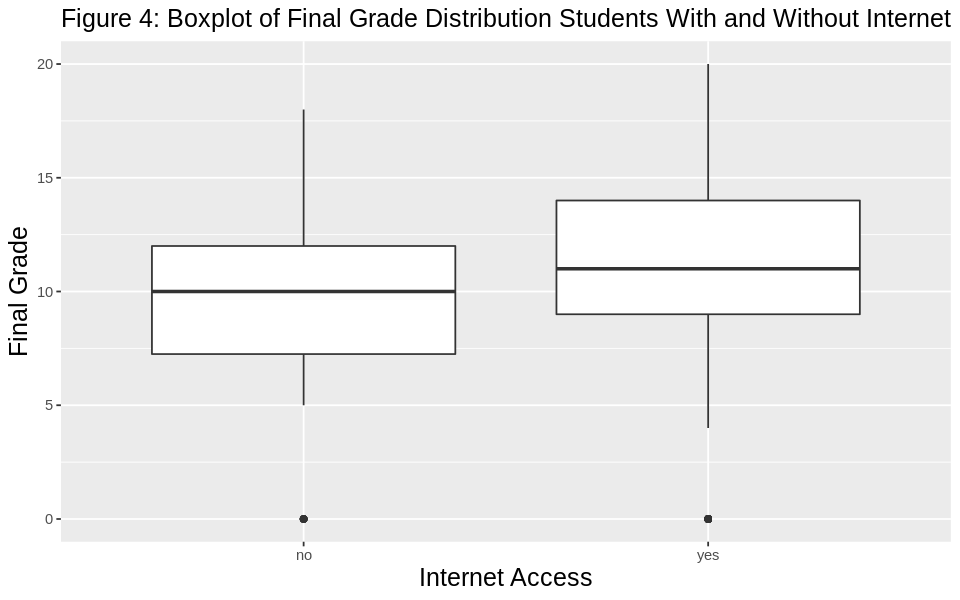

In [22]:
boxplot

Let's gain some additional confidence that the t-test variance assumption is met by doing an F test for equal variances with a 5% significance level. 

Here are our null and alternative hypotheses:

##### **Null hypothesis:**
$H_o: \sigma_1^2 = \sigma_2^2$
##### **Alternative hypothesis:**
$H_a: \sigma_1^2 \neq \sigma_2^2$

Now we will conduct the F test for equal variances.

In [23]:
#Conducting F-test
"Table 10: F Test for Equal Variances"
tidy(var.test(final_grade ~ internet, data = data, alternative = "two.sided"))

[1] "Table 10: F Test for Equal Variances"

Multiple parameters; naming those columns num.df, den.df



estimate,num.df,den.df,statistic,p.value,conf.low,conf.high,method,alternative
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.9590794,65,328,0.9590794,0.8623875,0.6726658,1.435354,F test to compare two variances,two.sided


Our p-value is 0.86 which is much larger than our significance level. Therefore, at a 5% significance level we do not reject the null hypothesis that the two variances are equal. We conclude that there is evidence suggesting the variance of final grades are not very different for those with access to internet at home and those without access.

## Discussion

Based on knowledge from previous studies, we expect that the mean grade of students without internet access is lower than the mean grade of students with internet access. After performing our hypothesis tests, we were able to show that the results are what we expected. Regardless of the method chosen (bootstrap vs. t-test), we will **reject the null hypothesis**. Because of this, we might be at risk of committing a Type 1 error; that is, the incorrect rejection of a correct null hypothesis. 

Overall, this report confirmed what we had hypothesized. The only thing that we did not expect was the similarity of the distribution of the 2 groups. In Figure 3, we can see that the mean final grade of students with and without internet access are roughly the same, and the shape of the distribution is also very similar. 
  
These findings could inform education and government decision-makers as to the best ways to support their students and improve overall scores. Specifically, governments should invest in providing students with internet access outside of school hours and at home. With equal internet access for students, educators can embrace it as a tool for learning and, ideally, improve test scores further. 

There are limitations to this study. Firstly, selection bias is very likely to be present here. Instead of the internet having a causal relationship with the final grade, we could instead be seeing second-order impacts of confounding variables. A potential confounding variable is household income, which logically is correlated with internet access (those with higher income are more likely to have internet at home), and can impact in other ways too. For instance, a student from a lower-income house may have to work long hours, and therefore have less time to study for class. The data used here is also not representative of all students worldwide, or even of students in Portugal. The dataset is from just 2 Portuguese schools, meaning that we might not be able to generalize our findings to all students across different schools and locations. Differences in teaching style, testing methods, and other variables can differentiate the Portuguese school system from others, leading to different importance in household internet. 


Because this research looks at how technology enables education to continue at home, we can ask more questions about these environments and how they impact student performance. For example, we might ask if students with their device(s) perform better than students who share devices with those in their families. Further, do students with newer models of devices (e.g. made in the last 5 years) perform better than students with older models. Finally, we might ask if students whose guardians have high technology and internet literacy perform better than students whose guardians do not. Like our research, these findings might inform government education spending and investments in technology for students.





## References

Austin, W., & Totaro, M. W. (2011). High school students academic performance and internet usage. *Journal of Economics and Economic Education Research, 12*(1), 41–54.


Cortez, P., & Silva, A. M. G. (2008). Using Data Mining to Predict Secondary School Student Performance. *In A. Brito, & J. Teixeira (Eds.), Proceedings of 5th Annual Future Business Technology Conference, Porto*, 5-12.



Sampath Kumar, B. T., & Manjunath, G. (2013). Internet use and its impact on the academic performance of university teachers and researchers: A comparative study. *Emerald Journal of Higher Education, Skills and Work-Based Learning, 3*(3), 219–238.